# Исследование рынка криптовалют с помощью `pandas` и `matplotlib`

**Датасет сконструирован на основании данных, представленных на kaggle:**
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory/data

## **1. Данные**

In [1]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 21.4MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
coins = pd.read_csv('coins.csv', sep=',')

In [22]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


***В колонках датафрейма представлены следующие данные:***

 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

In [6]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37588 entries, 0 to 37587
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             37588 non-null  object 
 1   price            37261 non-null  float64
 2   txCount          36068 non-null  float64
 3   txVolume         35758 non-null  float64
 4   activeAddresses  36068 non-null  float64
 5   symbol           37588 non-null  object 
 6   name             37588 non-null  object 
 7   open             37588 non-null  float64
 8   high             37588 non-null  float64
 9   low              37588 non-null  float64
 10  close            37588 non-null  float64
 11  volume           37588 non-null  float64
 12  market           37588 non-null  float64
dtypes: float64(10), object(3)
memory usage: 3.7+ MB


In [7]:
print('Представлено различных монет:', coins['name'].nunique())

Представлено различных монет: 70


***Представлены данные за следующий период:***

In [ ]:
sorted_dates = coins['date'].sort_values()
pd.DataFrame(data=[sorted_dates.head(1).iloc[0], sorted_dates.tail().iloc[-1]], columns=["date"], index=["from", "to"])

,date
from,2013-04-28
to,2018-06-06


***Пропуски в данных***

In [ ]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

***Отсутствующие данные***

In [ ]:
coins[coins['price'].isnull()]['price'].reset_index()
absent = coins[coins['price'].isnull()][['price', 'symbol', 'date']].reset_index()
absent

,index,price,symbol,date
0,17983,NaN,BTM,2017-07-13
1,18018,NaN,BTM,2017-07-14
2,18053,NaN,BTM,2017-07-15
3,18089,NaN,BTM,2017-07-16
4,18125,NaN,BTM,2017-07-17
...,...,...,...,...
322,37297,NaN,VEN,2018-06-02
323,37367,NaN,VEN,2018-06-03
324,37437,NaN,VEN,2018-06-04
325,37507,NaN,VEN,2018-06-05


In [ ]:
absent['symbol'].unique()

array(['BTM', 'VEN', 'KNC'], dtype=object)

***Удаление отсутствующих данных***

In [15]:
coins.dropna(inplace = True)

***Дата появления монеты с самой высокой стоимостью***

In [ ]:
max_price = coins['price'].max()
coins[coins['price'] == max_price][['date', 'price', 'name']]

,date,price,name
25971,2017-12-17,19475.8,Bitcoin


***Монета с самой высокой и самой низкой средней капитализацией***

In [25]:
mean = coins.groupby('name')['market'].mean()
market_min = mean.min()
market_max = mean.max()
name_min = mean[mean == market_min].index[0]
name_max = mean[mean == market_max].index[0]

In [27]:
print('Самая низкая средняя капитализация у', name_min, 'и составляет', market_min)
print('Самая высокая средняя капитализация у', name_max, 'и составляет', market_max)

Самая низкая средняя капитализация у KingN Coin и составляет 42520.71487603306
Самая высокая средняя капитализация у Bitcoin и составляет 30782136351.01822


Отображение результата на круговой диаграмме:

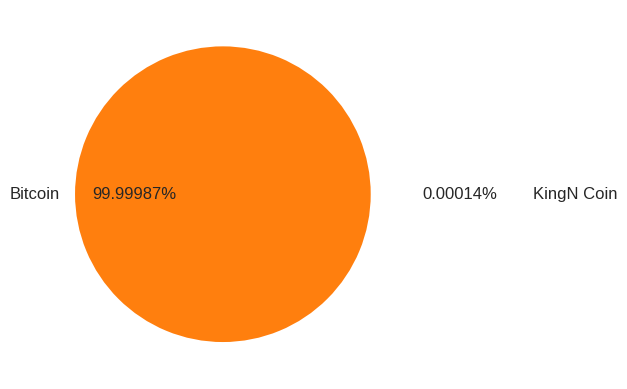

In [ ]:
import matplotlib.pyplot as plt
plt.pie([market_min, market_max],
        labels = [name_min, name_max],
        explode = (0, 1),
        autopct='%.5f%%')
plt.show()

**Вывод**: самая высокая средняя капитализация у Bitcoin, самая низкая у KingN Coin.

## **2. Визуализация**



***Функция для визуализации цен выбранной валюты за выбранный диапазон дат.***

Для построения графика использован инструмент `candlestick_ohlc` модуля `mplfinance`.

In [17]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime

In [19]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):

    # Подготовка данных
    filter = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    ohlc = filter.loc[:, ['date', 'open', 'high', 'low', 'close']]
    ohlc['date'] = pd.to_datetime(ohlc['date'])
    ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)

    #График
    fig, ax = plt.subplots(figsize = (16, 7))
    candlestick_ohlc(ax, ohlc.values, width=0.6,
                 colorup='green', colordown='red', alpha=0.8)

    #Форматирование даты
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    #Заголовок
    ax.set_title(f'Динамика цен на {symbol} по дням', fontsize=15, color='black')

    #Подписи осей
    plt.xlabel('Дата', fontdict=dict(color='black', weight='normal', size=14))
    plt.ylabel('Цена, $', fontdict=dict(color='black', weight='normal', size=14))

    #Сетка
    plt.grid(True)
plt.show()

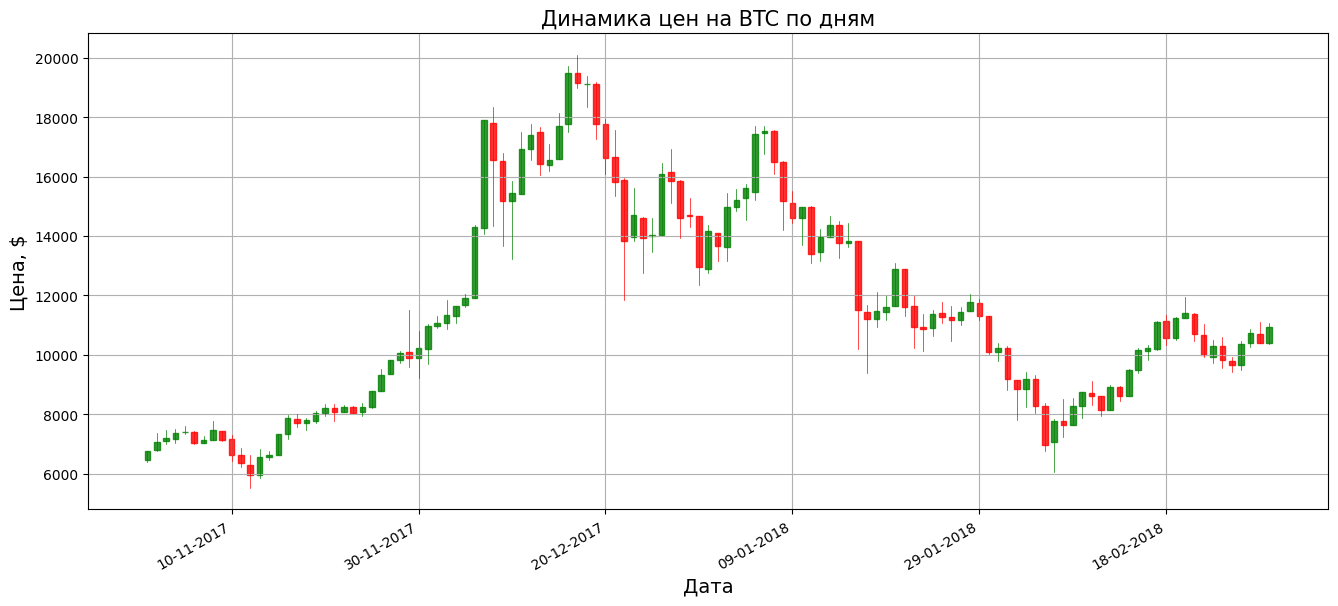

In [21]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2017-11-01', end_date='2018-03-01')

Вывод: на графике отображены цены начала (open) и конца продаж (close), а также минимальная (low) и максимальная (high) цена за день для BTC в период с 2017-11-01 по 2018-03-01.

## **3. Pump'n'dump**

Cмысл явления заключается в следующем. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Для определения **самого сильного pump'n'dump** монеты на заданном промежутке времени определено число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Также найден день, когда `pnd` был максимален, и величина `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    filter = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date) & (coins['symbol'] == symbol)]
    part = filter.loc[:, ['date', 'open', 'high', 'low', 'close', 'symbol']]
    part['pnd'] = part['high'] / np.maximum(part['open'], part['close'])
    max_pnd = part['pnd'].max()
    return part[part['pnd'] == max_pnd][['date','pnd', 'symbol']]

In [ ]:
symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ICN')

for symb in symbols:
    print(find_most_severe_pump_and_dump(coins, symb, start_date='2017-06-01', end_date='2018-06-01'))

            date       pnd symbol
24860 2017-11-29  1.142894    BTC
            date       pnd symbol
18170 2017-07-18  1.143351    ETH
            date       pnd symbol
17664 2017-07-03  1.320293    EOS
            date       pnd symbol
23827 2017-11-12  1.783945    BCH
            date       pnd symbol
22326 2017-10-16  1.332511    XLM
            date       pnd symbol
29373 2018-02-07  1.108226    LTC
            date       pnd symbol
25373 2017-12-07  2.586337    ICN


**Вывод:** самый сильный pump'n'dump на заданном промежутке времени наблюдается у ICN (Iconomi) 2017-12-07 и составляет 2,586. Также интересен показатель Bitcoin (1,143).

## **4. Окупаемость инвестиций**

Произведен подсчет **окупаемости инвестиций (ROI)** криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    total = 0
    invested = 0
    symbols = []
    for pair in investments.items():
        total += pair[1] / (coins[(coins['symbol'] == pair[0]) & (coins['date'] == start_date)]['price'].iloc[0]) * (coins[(coins['symbol'] == pair[0]) & (coins['date'] == end_date)]['price'].iloc[0])
        invested += pair[1]
        symbols.append(pair[0])
        res = ', '.join(symbols)
    return f'{res} ''ROI is {:.2f} %'.format((total - invested) / invested * 100)

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

'BTC, LTC ROI is -3.56 %'

**Вывод:** показатель окупаемости для BTC, LTC составляет -3,5 % за период с 2018-04-04 по 2018-06-01.

## **5. Технический анализ**

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику.
В расчете используются границы Боллинджера, рассчитываемые по следующей формуле:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Построение **графика цены**, **скользящего среднего** и **границ Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

In [ ]:
import mplfinance as mpf

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):

    # Необходимые расчеты и срезы
    moving_average = coins[coins["symbol"] == symbol]["close"].rolling(window).mean()
    std = coins[coins["symbol"] == symbol]["close"].rolling(window).std()

    data = coins[(coins['symbol'] == symbol)]
    ohlc = data.loc[:, ['date', 'open', 'high', 'low', 'close']]

    #Форматировние даты
    ohlc.index = pd.DatetimeIndex(ohlc['date'])
    ohlc['date'] = pd.to_datetime(ohlc['date'])
    ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)

    # Элементы графика
    apdict = [mpf.make_addplot(moving_average,
                               color="orange",
                               label=f'Скользящее среднее за период дней: {window}'),
              mpf.make_addplot(moving_average + std * width,
                               color="grey",
                               label=f'границы Боллинджера (K={width})'),
              mpf.make_addplot(moving_average - std * width,
                               color="grey")]
    # Построение графика
    fig, ax = mpf.plot(ohlc, type='candle', style='binance',
            title=f'Технический анализ {symbol}',
            xlabel="Дата",
            ylabel='Цена, $',
                       figsize=(20, 6),
                       addplot=apdict,
                       fill_between=dict(y1 = (moving_average + std * width).values ,
                                         y2 = (moving_average - std * width).values,
                                         alpha=0.1, color="grey",
                                         interpolate=False),
                       returnfig=True)

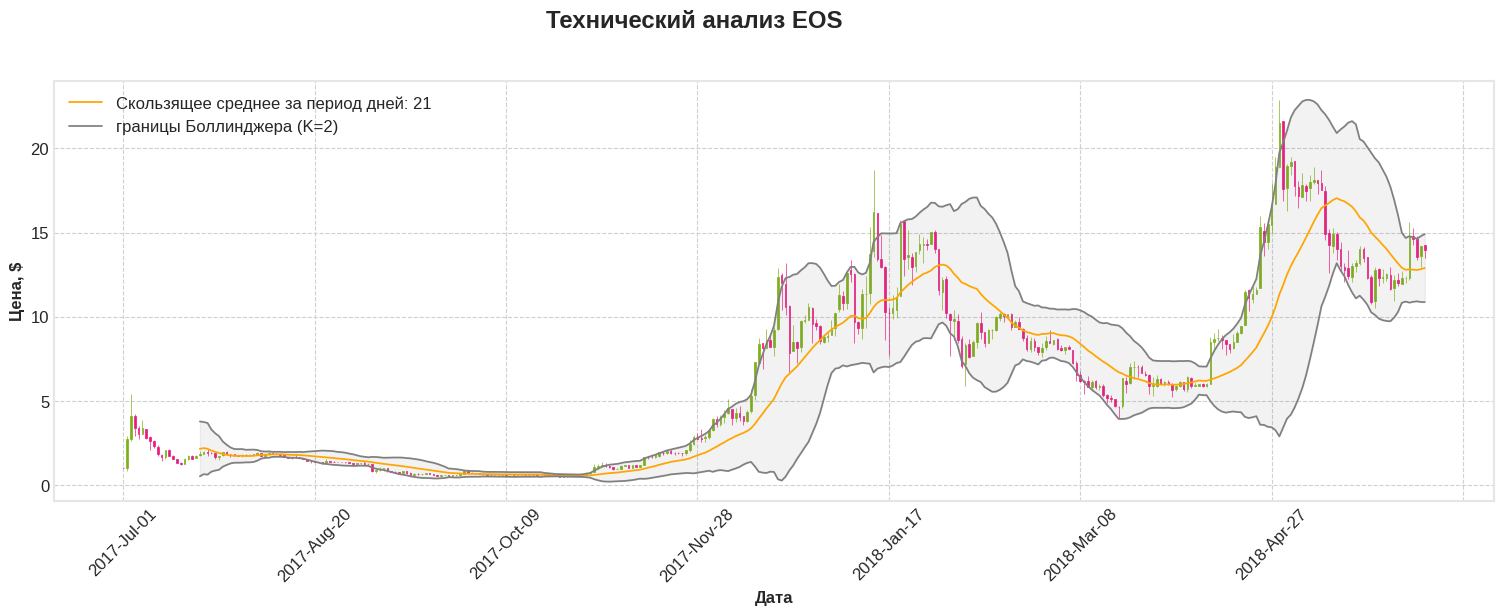

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

**Вывод:** на приведенном графике можно увидеть, что около 90-95% цен находятся в пределах границ Боллинджера и что около 5-10% цен выходит за пределы. Таким образом, правило Боллинджера скорее выполняется, чем нет.

## **6. Капитализация как индикатор**

**Построение графиков:**
1. Общей капитализации BTC, ETH, EOS, BCH, XLM, LTC.
2. Доли капитализаций этих монет от общей капитализации рынка.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):

# Для графика капитализации
    # Построение области рисования
    fig = plt.figure(figsize = (14,8))
    ax = fig.add_subplot(111)

    # Название графика
    ax.set_title(f'''Общая капитализация {', '.join(list(symbols))}, $''', fontsize=15, color='black')

    # Подписи осей
    ax.set_xlabel('Дата', fontdict=dict(color='black', weight='normal', size=14))
    ax.set_ylabel('Капитализация, $', fontdict=dict(color='black', weight='normal', size=14))

   # Расчеты и построение
    for symb in symbols:
        coins_top = coins.loc[
            (coins['symbol'] == symb) & (coins['date'] >= start_date),
            ['market', 'date']
        ]
        coins_grouped = coins_top.groupby('date')['market'].sum().reset_index()
        # Построение
        ax.plot(coins_grouped['date'],
                coins_grouped['market'],
                label=f'{symb}'
                )
            #Легенда
        ax.legend(
            loc='upper right',
            borderaxespad=1
        )

# Для графика долей
    # Построение области рисования
    fig = plt.figure(figsize = (14,8))
    ax = fig.add_subplot(111)

    # Название графика
    ax.set_title(f'''Доля капитализации {', '.join(list(symbols))} от общей капитализациии''', fontsize=15, color='black')

    # Подписи осей
    ax.set_xlabel('Дата', fontdict=dict(color='black', weight='normal', size=14))
    ax.set_ylabel('Доли капитализации', fontdict=dict(color='black', weight='normal', size=14))

   # Расчеты и построение
    coins_all = coins.loc[
        (coins['date'] >= start_date),
        ['market', 'date']
    ]
    coins_all_grouped = coins_all.groupby('date')['market'].sum()
    all = np.array(coins_all_grouped)

    for symb in symbols:
        coins_top = coins.loc[
            (coins['symbol'] == symb) & (coins['date'] >= start_date),
            ['market', 'date']
        ]

        coins_grouped = coins_top.groupby('date')['market'].sum().reset_index()
        particular = np.array(coins_grouped['market'])

        if particular.size < all.size:
            all_cut = all[(all.size - particular.size):]
            ax.plot(coins_grouped['date'],
               particular/all_cut,
               label=f'{symb}'
               )
        else:
            # Построение
            ax.plot(coins_grouped['date'],
                    particular/all,
                    label=f'{symb}'
                    )
            #Легенда
            ax.legend(
                loc='upper right',
                borderaxespad=1
            )
plt.show()

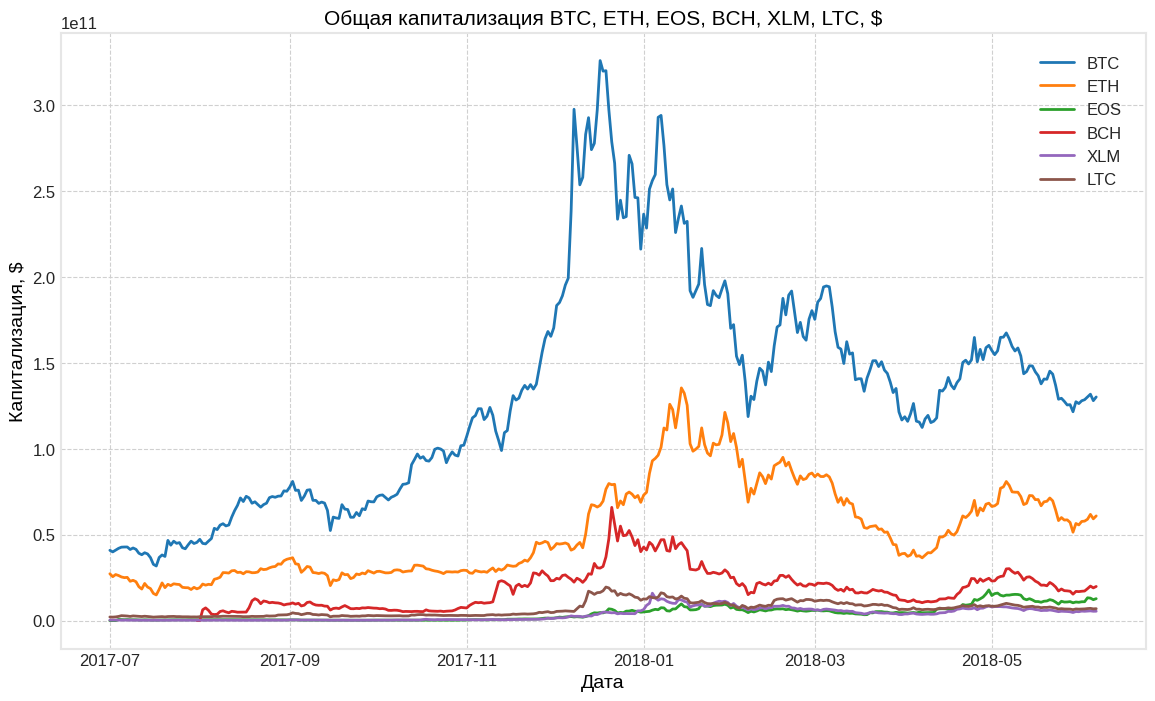

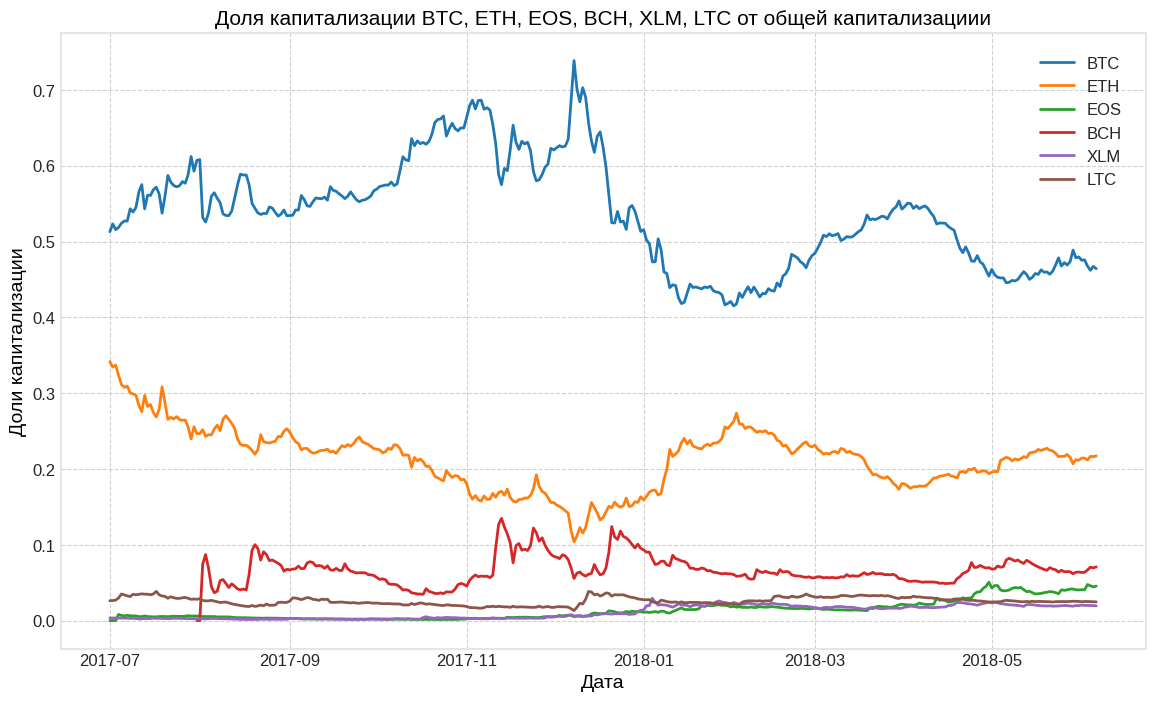

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

**Вывод:**
Предположительно, причина полученных на втором графике зависимостей связана с тем, что биткоин как криптоактив пользуется более высоким спросом по сравнению с другими криптовалютами. Соответственно, за выбранный для анализа период с 2017-07 по 2018-05 в обращении находится достаточно большое количество монет и/или стоимость данного криптоактива достаточно высока. Это приводит к тому, что доля биткоина стабильно выше, чем доля любой другой монеты, представленной на графике.

Наличие подобия симметрично отраженных кривых на примере BTC и ETH может объясняться тем, что крупные игроки по некоторым причинам могут продавать BTC при высоких его отметках и вкладываться в ETH.

## **7. Корреляции монет**

Рассмотрены корреляции средних долей капитализаций монет. Для этого рассчитано среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализована функция, возвращающая квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):

    # Построение таблицы долей
    fractions = []
    coins_all = coins.loc[
        (coins['date'] <= date),
        ['market', 'date']
    ]
    coins_all_grouped = coins_all.groupby('date')['market'].sum().reset_index()

    for symb in symbols:
        coins_top = coins.loc[
            (coins['symbol'] == symb) & (coins['date'] <= date),
            ['market', 'date']
        ]

        coins_grouped = coins_top.groupby('date')['market'].sum().reset_index()
        fraction = coins_grouped['market']/coins_all_grouped['market']
        fractions.append(fraction)

    start_date = coins[coins['date'] == coins['date'].min()]['date'][0]
    fracs_table = pd.DataFrame(
        data = np.array(fractions).T,
        columns=symbols,
        index = pd.date_range(start = start_date, end = date)
        )

    # Нахождение средних сглаженных для таблицы долей
    sma = fracs_table.ewm(alpha = alpha, min_periods = window, adjust=True).mean()
    sma.dropna(inplace=True)

    # Построение матрицы корреляций
    corr_matrix = sma.corr()
    return corr_matrix

Построение матриц корреляций для разных периодов:

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

correlations.style.background_gradient(cmap='coolwarm').format(precision = 2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.34,-0.23,0.19,-0.59,0.17,0.16
ETH,-0.34,1.00,0.42,-0.31,0.34,-0.42,-0.28
EOS,-0.23,0.42,1.00,-0.36,0.24,-0.59,-0.59
BCH,0.19,-0.31,-0.36,1.00,-0.17,0.14,0.61
XLM,-0.59,0.34,0.24,-0.17,1.00,-0.43,-0.16
LTC,0.17,-0.42,-0.59,0.14,-0.43,1.00,0.27
ADA,0.16,-0.28,-0.59,0.61,-0.16,0.27,1.00


In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations.style.background_gradient(cmap='coolwarm').format(precision = 2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.59,-0.19,-0.17,-0.78,0.23,-0.12
ETH,-0.59,1.00,0.37,0.33,0.65,-0.61,0.23
EOS,-0.19,0.37,1.00,0.92,0.21,-0.35,0.63
BCH,-0.17,0.33,0.92,1.00,0.19,-0.34,0.77
XLM,-0.78,0.65,0.21,0.19,1.00,-0.47,0.13
LTC,0.23,-0.61,-0.35,-0.34,-0.47,1.00,-0.20
ADA,-0.12,0.23,0.63,0.77,0.13,-0.20,1.00


## **8. Анализ графика цены**

Представлен график цены со скользящими средними:

1. С окном 21 день (ведущее скользящее среднее)
2. С окном 50 дней (запаздывающее скользящее среднее)

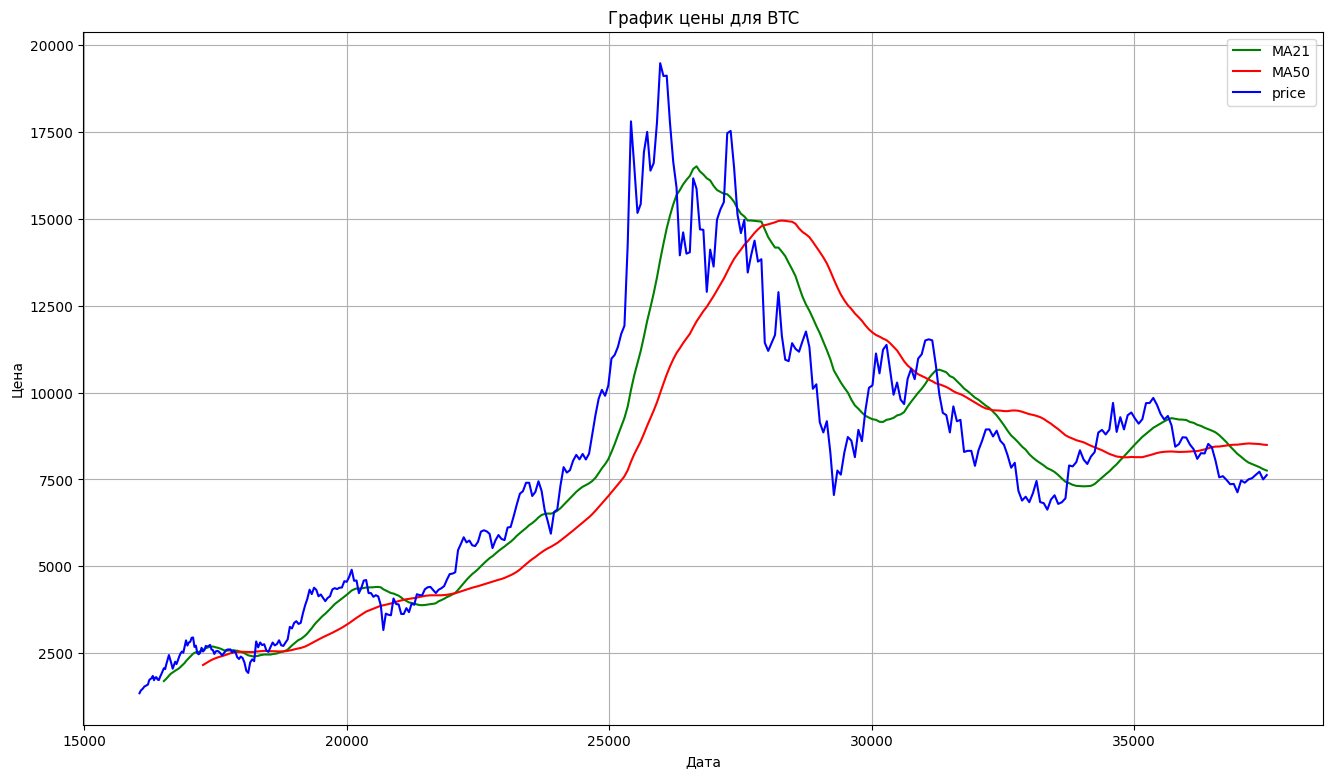

In [29]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins.loc[(coins['symbol'] == symbol) & (coins['date'] <= end_date) & (coins['date'] >= start_date)]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('График цены для {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

**Вывод:** скользящее среднее с окном 50 дней медленнее реагирует на изменение цены, чем скользящее среднее с окном 21.